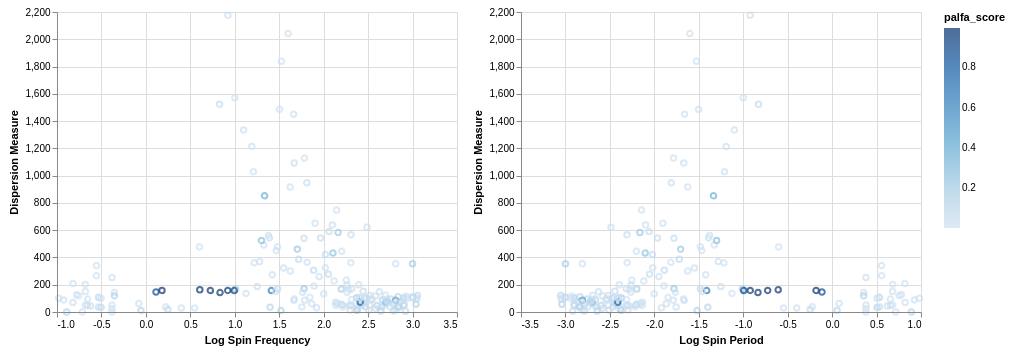

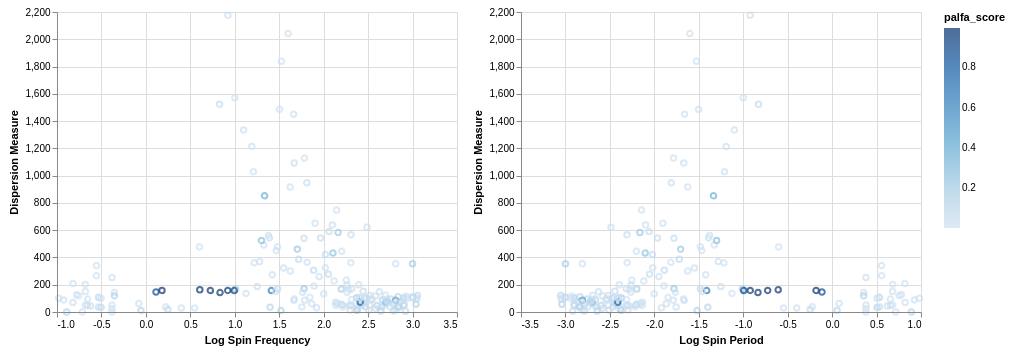

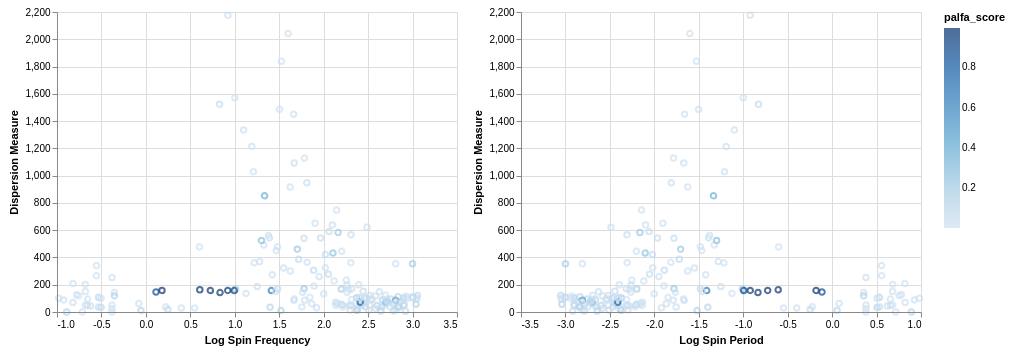

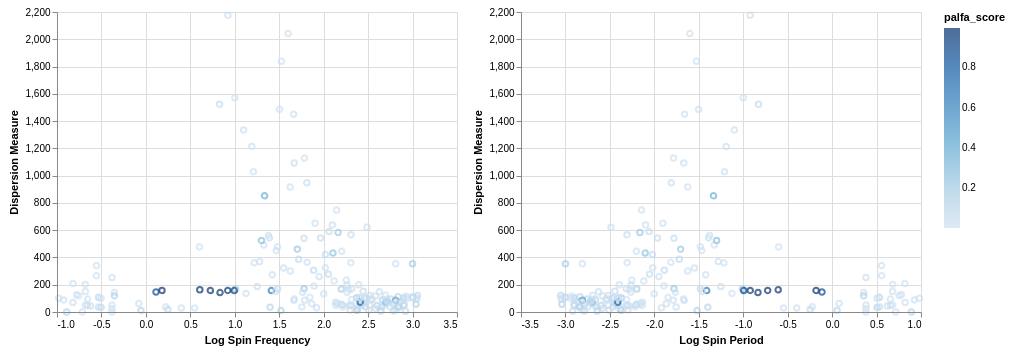

In [35]:
%matplotlib inline
import altair as alt
alt.renderers.enable('notebook')
import pandas as pd
import numpy as np
from vega_datasets import data
df = pd.read_json('data.txt', lines=True, encoding = 'UTF-8')

df['log_topo_p1'] = np.log10(df['topo_p1'])
df['log_fold_p1'] = np.log10(df['fold_p1'])
interval = alt.selection_interval()
chart=alt.Chart(df).mark_point().encode(
    x=alt.X('log_fold_p1', axis=alt.Axis(title='Log Spin Frequency')),
    y=alt.Y('best_dm', axis=alt.Axis(title='Dispersion Measure')),
    color = alt.condition(interval, 'palfa_score', alt.value('lightgray'))
).properties(
selection = interval)

chart1=alt.Chart(df).mark_point().encode(
    x=alt.X('log_topo_p1', axis=alt.Axis(title='Log Spin Period')),
    y=alt.Y('best_dm', axis=alt.Axis(title='Dispersion Measure')),
    color = alt.condition(interval, 'palfa_score', alt.value('lightgray'))
).properties(
selection = interval)
chart | chart1


In [ ]:
alt.Chart(df).mark_circle(size=60).encode(
   x=alt.X('log_fold_p1', axis=alt.Axis(title='Log Topocentric Frequency')),
   y=alt.Y('best_dm', axis=alt.Axis(title='Dispersion Measure')),
   color=alt.Color('palfa_score'),
   column = 'telescope',
   #color=alt.value('black'),
   opacity=alt.value(1),
   tooltip=['topo_p1', 'best_dm', 'palfa_score', 'telescope']
   
).interactive()

In [ ]:
alt.Chart(df).mark_bar(size=60).encode(
   x=alt.X('log_fold_p1',bin = True, axis=alt.Axis(title='Log Topocentric Frequency')),
   y=alt.Y('best_dm', bin=True, axis=alt.Axis(title='Dispersion Measure')),
   #color=alt.Color('palfa_score'),
   color = 'count()'
   #tooltip=['topo_p1', 'best_dm', 'palfa_score', 'telescope']
   
).interactive()

In [ ]:
# define selection
brush = alt.selection_interval()
from altair.expr import datum
scatter = alt.Chart(df).mark_circle(size=60).encode(
   x=alt.X('topo_p1', axis=alt.Axis(title='Topocentric Spin Period')),
   y=alt.Y('best_dm', axis=alt.Axis(title='Dispersion Measure')),
   color=alt.Color('palfa_score'),
   tooltip=['topo_p1', 'best_dm', 'palfa_score', 'telescope']
   
).interactive()

legend = alt.Chart(df).mark_rect().encode(
    y=alt.Y('telescope', axis=alt.Axis(title='Telescope')),
    #color=alt.condition(click, 'telescope', 
       #                 alt.value('lightgray'), legend=None),
    size=alt.value(250)
)
chart = (scatter | legend)
chart.save('mpi_1.html')

In [ ]:
cars = data.cars.url

# define selection
click = alt.selection_multi(encodings=['color'])

# scatter plots of points
scatter = alt.Chart(cars).mark_circle().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    size=alt.Size('Cylinders:O',
        scale=alt.Scale(range=(20,100))
    ),
    color=alt.Color('Origin:N', legend=None),
    tooltip=['Name:N','Horsepower:Q','Miles_per_Gallon:Q',
             'Cylinders:O','Origin:N'],
).transform_filter(
    click
).interactive()

# legend
legend = alt.Chart(cars).mark_rect().encode(
    y=alt.Y('Origin:N', axis=alt.Axis(title='Select Origin')),
    color=alt.condition(click, 'Origin:N', 
                        alt.value('lightgray'), legend=None),
    size=alt.value(250)
).properties(
    selection=click
)

chart = (scatter | legend)
chart.save('cars-clickable-legend.html')

In [ ]:
cars

In [ ]:
from mw_plot import MWSkyMap
import matplotlib
matplotlib.use("TkAgg")
import numpy as np
from astropy import units as  u
import astropy.coordinates as apycoords
from astropy.coordinates import SkyCoord
from astroNN.gaia import gaiadr2_parallax

#ra, dec, parallax, parallax_error = gaiadr2_parallax(cuts=.20, keepdims=False, offset=0.00)
ra = catalogue['ra'].values
dec = catalogue['dec'].values
parallax = catalogue['P0'].values
# setup a MWSkyMap instance
plot_instance = MWSkyMap(projection='equirectangular')

#parallax[parallax>1] = 1.

# so that the colorbar will has a better contract
plot_instance.clim = (0., 2000.)

# alpha value for the milkyway image
plot_instance.imalpha = 1.

# setup colormap
plot_instance.cmap = 'gnuplot'

# set up plot title
plot_instance.title = 'Known Pulsars in Milky way'

# use mw_scatter instead of scatter because we want a colorbar
plot_instance.mw_scatter(ra * u.degree, dec * u.degree,[parallax, 'Spin Period'], lw = 2, marker = 'x')

plot_instance.savefig(file='adr14_gdr2_skymap.png')

# Show the figure
plot_instance.show()

# Test with psrcat

In [155]:
%matplotlib inline
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.enable('json')
import psrqpy
from astropy.coordinates import Angle
from astropy import units as  u
from astropy.coordinates import ICRS, Galactic, FK4, FK5, SkyCoord 
catalogue = psrqpy.QueryATNF(params=['PSRJ','P0','P1', 'DM','DIST', 'F0', 'F1', 'RAJ', 'DecJ','Dist_DM','AGE','BSurf', 'Date'])
catalogue = catalogue.table
catalogue = catalogue.to_pandas()

In [156]:
coordinates = catalogue['RAJ'] + ' ' + catalogue['DECJ']
coordinates = coordinates.replace(to_replace='None None', value='0:00:00 0:00:00')
catalogue['log_P0'] = np.log10(catalogue['P0'].values)
catalogue['log_P1'] = np.log10(catalogue['P1'].values)
catalogue['log_F0'] = np.log10(catalogue['F0'].values)
catalogue['log_AGE'] = np.log10(catalogue['AGE'].values)
catalogue['log_DIST_DM'] = np.log10(catalogue['DIST_DM'].values)
catalogue['DIST_DM'] = catalogue['DIST_DM'].fillna(0)
catalogue['BSURF'] = catalogue['BSURF'].fillna(0)
c = SkyCoord(coordinates.values, unit=(u.hourangle, u.deg))
catalogue['ra'] = c.ra.degree
catalogue['dec']= c.dec.degree


In [157]:
xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.8         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 1000)
ml_scores=pd.DataFrame(m, columns=['pics','peace'])
catalogue=pd.concat([catalogue,ml_scores],axis=1)
url = 'data.json'
catalogue.to_json(url, orient='records')

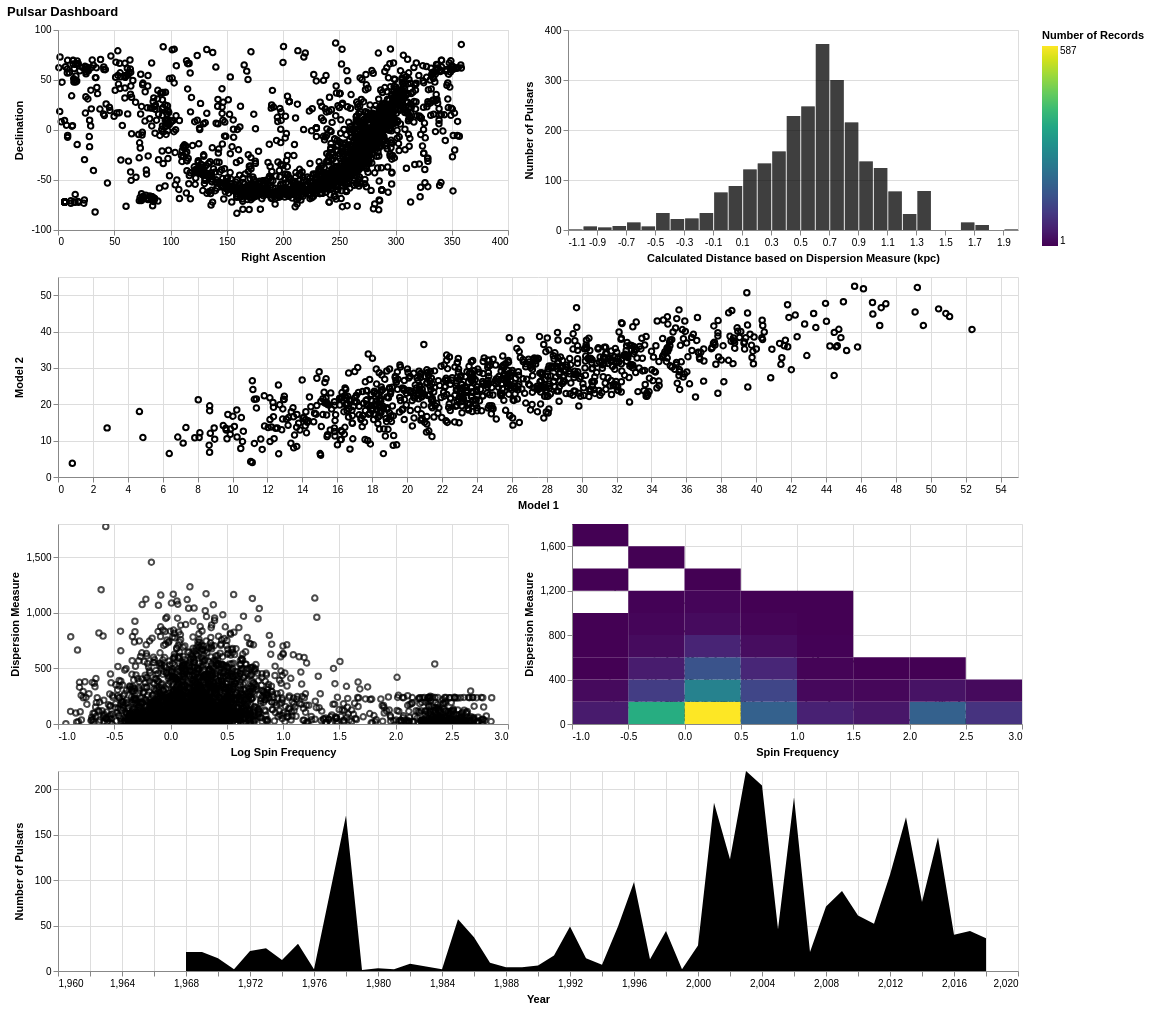

In [159]:
bkg_colour = "#18183D"
grid_colour = "darkgrey"
label_colour = "lightgrey"
highlight_colour = "#FFFFFFF"
mean_colour = "#7FCDBB"
fade_colour = "#225EA8"


# RA & Dec: Distribution of pulsars
interval = alt.selection_interval(encodings=['x'])

coordinates=alt.Chart(url).mark_point(opacity = 1).encode(
    alt.X('ra:Q', axis=alt.Axis(title='Right Ascention'),scale=alt.Scale(zero=False, domain=[0,360])),
    alt.Y('dec:Q', axis=alt.Axis(title='Declination'), scale=alt.Scale(zero=False, domain=[-90, +90])),
    color = alt.condition(interval, alt.value("black"), alt.value(highlight_colour)),
    tooltip = ['PSRJ:O', 'ra:Q', 'dec:Q', 'DM:Q','P0:Q', 'F0:Q'],
    opacity=alt.value(1.0)
).properties(
selection = interval,
height=200,
width=450
)

# P-Pdot diagram
p_pdot = alt.Chart(url).mark_circle(size=6).encode(
    x=alt.X("log_P0:Q", axis=alt.Axis(title="Spin Period")),
    y=alt.Y('log_P1:Q',  axis=alt.Axis(title='Spin Period Derivative')),
    tooltip = ['PSRJ:O', 'ra:Q', 'dec:Q', 'DM:Q','P0:Q', 'F0:Q'],
    color = alt.condition(interval, alt.value("black"), alt.value(highlight_colour)),
).properties(
selection = interval,
height=200,
width=450
)

#Age of pulsar histogram
age_histogram = alt.Chart(url).mark_bar().encode(
    x=alt.X("log_AGE:Q", bin=alt.Bin(maxbins=40), axis=alt.Axis(title="Age of pulsar 10^years"), \
           scale=alt.Scale(zero=False, domain=[2,12])
           ),
    tooltip = ['PSRJ:O', 'ra:Q', 'dec:Q', 'DM:Q','P0:Q', 'F0:Q'],
    y=alt.Y('count()', axis=alt.Axis(title="Number of Pulsars")),
    #color = alt.condition(interval, alt.value("red"), alt.value(highlight_colour)),
    color = alt.value('red'),
).properties(
selection = interval,
height=200,
width=450
)
#DM Distance
dm_histogram = alt.Chart(url).mark_bar().encode(
    x=alt.X("log_DIST_DM:Q", bin=alt.Bin(maxbins=40), axis=alt.Axis(title="Calculated Distance based on Dispersion Measure (kpc)")),
    y=alt.Y('count()', axis=alt.Axis(title="Number of Pulsars")),
    #color = alt.condition(interval, alt.value("red"), alt.value(highlight_colour)),
    color = alt.value("black"),
    tooltip = ['PSRJ:O', 'ra:Q', 'dec:Q', 'DM:Q','P0:Q', 'F0:Q']
).properties(
selection = interval,
height=200,
width=450
).interactive()

#Spin Frequency vs dm
spin_frequency_dm =alt.Chart(url).mark_point().encode(
    x=alt.X('log_F0:Q', axis=alt.Axis(title='Log Spin Frequency')),
    y=alt.Y('DM:Q', axis=alt.Axis(title='Dispersion Measure')),
    tooltip = ['PSRJ:O', 'ra:Q', 'dec:Q', 'DM:Q','P0:Q', 'F0:Q'],
   color = alt.condition(interval, alt.value("black"), alt.value(highlight_colour)),
).properties(
selection = interval,
height=200,
width=450
).interactive()

#Spin Period vs dm
spin_period_dm =alt.Chart(url).mark_point().encode(
    x=alt.X('log_P0:Q', axis=alt.Axis(title='Log Spin Period')),
    y=alt.Y('DM:Q', axis=alt.Axis(title='Dispersion Measure')),
    tooltip = ['PSRJ:O', 'ra:Q', 'dec:Q', 'DM:Q','P0:Q', 'F0:Q'],
    color = alt.condition(interval, alt.value("black"), alt.value(highlight_colour)),
).properties(
selection = interval,
height=200,
width=450
).interactive()

#Discovery chart
discovery_chart = alt.Chart(url).mark_area().encode(
    x=alt.X('DATE:Q',scale= alt.Scale(zero=False, domain=[1960,2019]), axis=alt.Axis(title='Year'), ),
    y=alt.Y('count()', axis=alt.Axis(title="Number of Pulsars")),
   color =  alt.value("black"),
).properties(
    #selection = interval,
    height=200,
    width=960).interactive()

heatmap = alt.Chart(url).mark_rect().encode(
    alt.X('log_F0:Q', bin=True, axis=alt.Axis(title="Spin Frequency")),
    alt.Y('DM:Q', bin=True, axis=alt.Axis(title="Dispersion Measure")),
    alt.Color('count():Q')
).properties(
selection = interval,
height=200,
width=450
).interactive()

points = alt.Chart(url).mark_circle(
    color='black',
    size=5,
).encode(
    x='log_F0:Q',
    y='DM:Q',
)

ml_model=alt.Chart(url).mark_point(opacity = 1).encode(
    alt.X('pics:Q', axis=alt.Axis(title='Model 1')),
    alt.Y('peace:Q', axis=alt.Axis(title='Model 2')),
    color = alt.condition(interval, alt.value("black"), alt.value(highlight_colour)),
    tooltip = ['PSRJ:O', 'ra:Q', 'dec:Q', 'DM:Q','P0:Q', 'F0:Q'],
    opacity=alt.value(1.0)
).properties(
selection = interval,
height=200,
width=960
).interactive()
final_chart = ((coordinates | dm_histogram) & (ml_model ) & (spin_frequency_dm | (points + heatmap))  & (discovery_chart)).properties(
    title='Pulsar Dashboard')
final_chart.save('dashboard.html')
final_chart